In [2]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import pandas as pd
import scipy
import math
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import math
from sklearn.model_selection import train_test_split
from datetime import datetime
from notebooks.variable_selection.util import *

In [4]:
X, beta, y_log = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.5, stratify=y_log)

In [6]:
assoc_mat = get_assoc_mat(200, 10)

In [28]:
n_iter = 15
l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
l2_vals = np.logspace(-5, 1, n_iter)
# l2_vals = np.concatenate([np.array([0]), l2_vals])
gammas = np.logspace(-2, 3, 10)

In [29]:
gammas

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

Run Logistic regression with $\Vert\beta\Vert^{2}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ using **gradient descent**

In [9]:
from notebooks.variable_selection.grad_util import run_logisitic_reg_exp, build_table_from_log

train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0, \
    train_l1_pen_0, test_l1_pen_0, train_l2_pen_0, test_l2_pen_0, min_l1_vals_0, min_l2_vals_0, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=True)

res_1_df = build_table_from_log(gammas, train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0,
                                train_l1_pen_0, test_l1_pen_0, min_l1_vals_0, train_l2_pen_0, test_l2_pen_0, min_l2_vals_0)

res_1_df

[2022-02-15 21:20:39.800956] - gamma - 0.01
Min l1: 0.517947467923121, Min l2: 1e-05, CV Error: 0.6447681037931782, Test error: 0.5776471536376147
ll_pen_train: 0.11924188639907889, l1_pen_train: 0.43667243933214717, l2_pen_train: 0.0
[2022-02-15 21:22:56.030762] - gamma - 0.04
Min l1: 0.517947467923121, Min l2: 1e-05, CV Error: 0.6447681037931782, Test error: 0.5776471536376147
ll_pen_train: 0.11924188639907889, l1_pen_train: 0.43667243933214717, l2_pen_train: 0.0
[2022-02-15 21:25:13.618068] - gamma - 0.13
Min l1: 0.517947467923121, Min l2: 1e-05, CV Error: 0.6447681037931782, Test error: 0.5776471536376147
ll_pen_train: 0.11924188639907889, l1_pen_train: 0.43667243933214717, l2_pen_train: 1.3660916487959974e-149
[2022-02-15 21:27:25.786220] - gamma - 0.46
Min l1: 0.517947467923121, Min l2: 10.0, CV Error: 0.6447681037910507, Test error: 0.5776471536376147
ll_pen_train: 0.11924188771929271, l1_pen_train: 0.43667243678316875, l2_pen_train: 1.255072461871067e-10
[2022-02-15 21:29:42.22

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.644768,0.517947,0.000010,0.119242,0.436672,0.000000e+00,0.577647,0.134337,0.455989,0.000000e+00
1,0.035938,0.644768,0.517947,0.000010,0.119242,0.436672,0.000000e+00,0.577647,0.134337,0.455989,0.000000e+00
2,0.129155,0.644768,0.517947,0.000010,0.119242,0.436672,1.366092e-149,0.577647,0.134337,0.455989,5.490294e-238
3,0.464159,0.644768,0.517947,10.000000,0.119242,0.436672,1.255072e-10,0.577647,0.134337,0.455989,4.931718e-18
4,1.668101,0.639282,0.010000,0.000072,0.119942,0.451658,1.582575e+03,0.604289,0.051304,0.725409,9.688713e+02
5,5.994843,0.637575,0.010000,0.000010,0.182480,0.352503,1.322755e+04,0.593628,0.221165,0.343749,1.366682e+04
6,21.544347,0.638809,0.010000,0.000010,0.206808,0.322423,1.356527e+04,0.600184,0.265780,0.292953,1.371660e+04
7,77.426368,0.638927,0.010000,0.000010,0.208783,0.320125,1.358509e+04,0.600774,0.269428,0.289142,1.370078e+04
8,278.255940,0.638937,0.010000,0.000010,0.208936,0.319948,1.358659e+04,0.600820,0.269711,0.288847,1.369944e+04
9,1000.000000,0.638937,0.010000,0.000010,0.208948,0.319934,1.358670e+04,0.600823,0.269733,0.288825,1.369933e+04


Run Logistic regression with $\Vert\beta\Vert^{1}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ using **gradient descent**

In [10]:
from notebooks.variable_selection.grad_util import run_logisitic_reg_exp, build_table_from_log

# l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
# l2_vals = np.logspace(-4, -2, n_iter)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False)

res_2_df = build_table_from_log(gammas, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_2_df

[2022-02-15 21:43:00.349887] - gamma - 0.01
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3455976851420618, Test error: 0.2895088549744676
ll_pen_train: 0.04503046713714834, l1_pen_train: 1.177390612430056, l2_pen_train: 0.0
[2022-02-15 21:48:27.779098] - gamma - 0.04
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3455976851420618, Test error: 0.2895088549744676
ll_pen_train: 0.04503046713714834, l1_pen_train: 1.177390612430056, l2_pen_train: 0.0
[2022-02-15 21:53:58.915165] - gamma - 0.13
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3455976851420618, Test error: 0.2895088549744676
ll_pen_train: 0.04503046713714834, l1_pen_train: 1.177390612430056, l2_pen_train: 3.624846858104438e-148
[2022-02-15 21:59:29.421672] - gamma - 0.46
Min l1: 0.01, Min l2: 0.0013894954943731374, CV Error: 0.3384476742899161, Test error: 0.2895088549744676
ll_pen_train: 0.04502387816632164, l1_pen_train: 1.192662482788068, l2_pen_train: 2.963871345731319e-10
[2022-02-15 22:05:02.971415] - gamma - 1.67
Min l1: 0.01, Min l2: 1

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.345598,0.010000,0.000010,0.045030,1.177391,0.000000e+00,0.289509,0.050218,1.231253,0.000000e+00
1,0.035938,0.345598,0.010000,0.000010,0.045030,1.177391,0.000000e+00,0.289509,0.050218,1.231253,0.000000e+00
2,0.129155,0.345598,0.010000,0.000010,0.045030,1.177391,3.624847e-148,0.289509,0.050218,1.231253,6.848959e-237
3,0.464159,0.338448,0.010000,0.001389,0.045024,1.192662,2.963871e-10,0.289509,0.050218,1.231253,1.162621e-17
4,1.668101,0.379618,0.010000,0.000010,0.066946,1.000611,2.944058e+03,0.305058,0.057098,1.191530,1.137545e+03
5,5.994843,0.480572,0.013895,0.000010,0.225639,0.503863,9.963831e+03,0.479906,0.268121,0.466394,1.019437e+04
6,21.544347,0.493470,0.010000,0.000010,0.237388,0.474656,1.105671e+04,0.507457,0.297439,0.415664,1.112715e+04
7,77.426368,0.494296,0.013895,0.000010,0.251737,0.449550,1.025518e+04,0.508966,0.315003,0.374396,1.018992e+04
8,278.255940,0.494843,0.010000,0.000010,0.239877,0.469807,1.104486e+04,0.508652,0.300079,0.410819,1.121372e+04
9,1000.000000,0.493777,0.013895,0.000010,0.252066,0.455664,1.024333e+04,0.506943,0.314445,0.383641,1.025223e+04


Focus on $\gamma$ values between 1 and 10 with $\Vert\beta\Vert^{2}$ norm and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$

In [12]:
gammas_2 = np.logspace(0, 1, 5)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas_2, l1_vals, l2_vals)

res_3_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_3_df

[2022-02-16 10:49:38.050847] - gamma - 1.00
Min l1: 0.19306977288832497, Min l2: 0.01, CV Error: 0.643259312268829, Test error: 0.5940647161165973
ll_pen_train: 0.1505694282601358, l1_pen_train: 0.3927399171669216, l2_pen_train: 8.774761511082763
[2022-02-16 10:51:53.442370] - gamma - 1.78
Min l1: 0.01, Min l2: 7.196856730011514e-05, CV Error: 0.638529457891458, Test error: 0.5927495701448272
ll_pen_train: 0.1501863126800364, l1_pen_train: 0.39895509835175014, l2_pen_train: 1731.640576702069
[2022-02-16 10:54:09.664287] - gamma - 3.16
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.6371509394132903, Test error: 0.5870258682671613
ll_pen_train: 0.1257433495497554, l1_pen_train: 0.44023793459548016, l2_pen_train: 11645.774483241252
[2022-02-16 10:56:24.836896] - gamma - 5.62
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.6374395440578449, Test error: 0.5928352796287943
ll_pen_train: 0.17906710879296509, l1_pen_train: 0.35701101150012066, l2_pen_train: 13165.579146436121
[2022-02-16 10:58:40.755890] -

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.000000,0.643259,0.19307,0.010000,0.150569,0.392740,8.774762,0.594065,0.051661,0.699152,0.477089
1,1.778279,0.638529,0.01000,0.000072,0.150186,0.398955,1731.640577,0.592750,0.075271,0.628245,1236.080318
2,3.162278,0.637151,0.01000,0.000010,0.125743,0.440238,11645.774483,0.587026,0.124202,0.497736,11555.342535
3,5.623413,0.637440,0.01000,0.000010,0.179067,0.357011,13165.579146,0.592835,0.214991,0.351486,13621.452275
4,10.000000,0.638374,0.01000,0.000010,0.199142,0.331539,13477.836207,0.597967,0.251638,0.308177,13750.829013


In [94]:
gammas_2 = np.logspace(0, 1, 5)
from notebooks.variable_selection.grad_util import run_logisitic_reg_exp
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas_2, np.zeros(l1_vals.shape[0]), l2_vals)

res_3_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_3_df

[2022-02-20 15:58:38.288878] - gamma - 1.00
Min l1: 0.0, Min l2: 0.01, CV Error: 0.6449191648623775, Test error: 0.7396635225147287
ll_pen_train: 0.1179296422698165, l1_pen_train: 0.4622061936576175, l2_pen_train: 11.39927611442931
[2022-02-20 16:00:47.886001] - gamma - 1.78
Min l1: 0.0, Min l2: 7.196856730011514e-05, CV Error: 0.6384332131846545, Test error: 0.5939147837310816
ll_pen_train: 0.1486262034137082, l1_pen_train: 0.4019696222954681, l2_pen_train: 1753.1094993485399
[2022-02-20 16:03:02.340901] - gamma - 3.16
Min l1: 0.0, Min l2: 1e-05, CV Error: 0.6370662122623301, Test error: 0.5873842489505975
ll_pen_train: 0.12414590841689872, l1_pen_train: 0.44386350165880206, l2_pen_train: 11803.710363255244
[2022-02-20 16:05:19.483552] - gamma - 5.62
Min l1: 0.0, Min l2: 1e-05, CV Error: 0.637262010647264, Test error: 0.5927568685314086
ll_pen_train: 0.17754946207148348, l1_pen_train: 0.3594953829222298, l2_pen_train: 13316.105977913332
[2022-02-20 16:07:36.566522] - gamma - 10.00
Min

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.000000,0.644919,0.0,0.010000,0.117930,0.462206,11.399276,0.739664,0.005409,1.309543,1.385410
1,1.778279,0.638433,0.0,0.000072,0.148626,0.401970,1753.109499,0.593915,0.073394,0.636540,1261.581062
2,3.162278,0.637066,0.0,0.000010,0.124146,0.443864,11803.710363,0.587384,0.122405,0.502561,11732.647814
3,5.623413,0.637262,0.0,0.000010,0.177549,0.359495,13316.105978,0.592757,0.213351,0.354142,13784.122283
4,10.000000,0.638181,0.0,0.000010,0.197656,0.333749,13625.299746,0.597819,0.250072,0.310387,13906.374705


Focus on $\gamma$ values between 1 and 10 with $\Vert\beta\Vert^{1}$ norm and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$

In [13]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas_2, l1_vals, l2_vals, l2_norm=False)

res_4_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_4_df

[2022-02-16 11:00:58.916789] - gamma - 1.00
Min l1: 0.01, Min l2: 2.6826957952797274e-05, CV Error: 0.3423566782808506, Test error: 0.2884372291445226
ll_pen_train: 0.04438678362597035, l1_pen_train: 1.2060045412025304, l2_pen_train: 31.692177283056726
[2022-02-16 11:06:31.567859] - gamma - 1.78
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.38601242686776543, Test error: 0.32203284851553854
ll_pen_train: 0.09124005284509056, l1_pen_train: 0.8790402421835019, l2_pen_train: 3249.172224025365
[2022-02-16 11:11:13.883463] - gamma - 3.16
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.45080877567079136, Test error: 0.4312806914010289
ll_pen_train: 0.15913037000178437, l1_pen_train: 0.6452594261449747, l2_pen_train: 9147.736302066422
[2022-02-16 11:15:42.595788] - gamma - 5.62
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.4788789903715549, Test error: 0.4779433940143749
ll_pen_train: 0.22396656814410534, l1_pen_train: 0.5026576381854537, l2_pen_train: 9790.845457991498
[2022-0

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.000000,0.342357,0.010000,0.000027,0.044387,1.206005,31.692177,0.288437,0.049791,1.251608,0.607959
1,1.778279,0.386012,0.013895,0.000010,0.091240,0.879040,3249.172224,0.322033,0.083512,0.967844,1442.785037
2,3.162278,0.450809,0.010000,0.000010,0.159130,0.645259,9147.736302,0.431281,0.162933,0.671546,8853.426119
3,5.623413,0.478879,0.013895,0.000010,0.223967,0.502658,9790.845458,0.477943,0.262713,0.467483,10114.693078
4,10.000000,0.489335,0.013895,0.000010,0.242883,0.466076,10119.627546,0.497962,0.298070,0.410299,10219.984255


Chech for different values of $\lambda_{1}$ by setting $\lambda_{2}$ to 0

In [14]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, np.array([1.0]), l1_vals, np.zeros(n_iter), l2_norm=False)

res_5_df = build_table_from_log(np.array([1.0]), train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_5_df

[2022-02-16 11:24:25.002820] - gamma - 1.00
Min l1: 0.01, Min l2: 0.0, CV Error: 0.3455976851420618, Test error: 0.2895088549744676
ll_pen_train: 0.04503046713714834, l1_pen_train: 1.177390612430056, l2_pen_train: 31.451497508027423


,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.345598,0.01,0.0,0.04503,1.177391,31.451498,0.289509,0.050218,1.231253,0.606858


Sample repeatedly from the distribution and compare with and without penalty. For penalty version, use $\gamma$ = 1, $\Vert\beta\Vert^{1}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ penalty

In [16]:
from notebooks.variable_selection.grad_util import *
import warnings
import traceback

warnings.filterwarnings('ignore')
results_1 = []
results_2 = []

n_sim = 10
beta_vals_1 = np.zeros((n_sim, 1, X_train.shape[1]))
beta_vals_2 = np.zeros((n_sim, 1, X_train.shape[1]))

gamma = np.array([1.0])
for i in range(n_sim):
    try:
        #log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_2[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, None, l2_norm=False)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)


        results_1.append(res_pen_df)
        results_2.append(res_no_pen_df)
    except Exception as e:
        #log_msg("Oh, no! An error occurred. Here is the error message")
        print(traceback.format_exc())


[2022-02-16 11:48:42.070634] - gamma - 1.00
Min l1: 0.019306977288832496, Min l2: 1e-05, CV Error: 0.48981824227212317, Test error: 0.5120123376904382
ll_pen_train: 0.09510525128653309, l1_pen_train: 0.8907988474963549, l2_pen_train: 18.334975774961663
[2022-02-16 11:54:04.822022] - gamma - 1.00
Min l1: 0.019306977288832496, CV Error: 0.490449985649786, Test error: 0.5121494152078817
ll_pen_train: 0.09610486800687924, l1_pen_train: 0.8886460432847507
[2022-02-16 11:54:16.380255] - gamma - 1.00
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.45908371692991556, Test error: 0.3649361550509838
ll_pen_train: 0.0662147685996994, l1_pen_train: 1.086947037641499, l2_pen_train: 21.997238155650024
[2022-02-16 11:59:39.557494] - gamma - 1.00
Min l1: 0.013894954943731374, CV Error: 0.460812177119588, Test error: 0.3735036090261294
ll_pen_train: 0.0664730864782466, l1_pen_train: 1.0795495306365195
[2022-02-16 11:59:52.091534] - gamma - 1.00
Min l1: 0.0372759372031494, Min l2: 1e-05, CV Err

In [17]:
#Fix argument mismatch in column names when building the dataframe
# results_1_pen_df["l1_train_cv"] = results_1_pen_df_cp["l2_pen_test"]
# results_1_pen_df["l2_pen_train_cv"] = results_1_pen_df_cp["l1_train_cv"]
# results_1_pen_df["l2_pen_test"] = results_1_pen_df_cp["l2_pen_train_cv"]

results_1_pen_df = pd.concat(results_1, axis=0)
results_1_pen_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.489818,0.019307,0.000010,0.095105,0.890799,18.334976,0.512012,0.105877,0.949231,0.351466
0,1.0,0.459084,0.013895,0.000010,0.066215,1.086947,21.997238,0.364936,0.076386,1.143100,0.401253
0,1.0,0.543349,0.037276,0.000010,0.187912,0.647003,8.865410,0.403037,0.212012,0.705715,0.170469
0,1.0,0.343167,0.010000,0.000010,0.044191,1.225578,34.162542,0.407679,0.049575,1.273963,0.699792
0,1.0,0.611380,0.051795,0.000518,0.297317,0.470006,3.907611,0.460321,0.325976,0.506302,0.070896
0,1.0,0.434396,0.013895,0.000010,0.069560,1.097766,23.946375,0.307426,0.076633,1.223673,0.494706
0,1.0,0.390115,0.010000,0.000027,0.047660,1.162614,30.793551,0.441654,0.054442,1.169258,0.604196
0,1.0,0.330696,0.010000,0.000027,0.045467,1.166412,33.597705,0.390874,0.049474,1.246153,0.696325
0,1.0,0.428103,0.010000,0.000010,0.048326,1.158276,30.799246,0.315330,0.052316,1.300803,0.625015
0,1.0,0.485237,0.026827,0.000193,0.139939,0.755997,12.192438,0.453655,0.154618,0.787502,0.236120


In [18]:
results_1_pen_df.mean(axis=0)

gamma                1.000000
min_train_err_cv     0.451535
l1_train_cv          0.020299
l2_train_cv          0.000082
ll_pen_train_cv      0.104169
l1_pen_train_cv      0.966140
l2_pen_train_cv     21.859709
test_err             0.405692
ll_pen_test          0.115731
l1_pen_test          1.030570
l2_pen_test          0.435024
dtype: float64

In [19]:
results_2_pen_df = pd.concat(results_2, axis=0)
results_2_pen_df

,gamma,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,1.0,0.490450,0.019307,0.096105,0.888646,0.512149,0.104597,0.948380
0,1.0,0.460812,0.013895,0.066473,1.079550,0.373504,0.077135,1.104715
0,1.0,0.549538,0.037276,0.191691,0.621772,0.395116,0.202479,0.751347
0,1.0,0.348136,0.010000,0.045348,1.189611,0.410312,0.050512,1.253529
0,1.0,0.616269,0.051795,0.296948,0.463407,0.446563,0.314386,0.557817
0,1.0,0.436070,0.010000,0.049805,1.239162,0.303280,0.056485,1.315793
0,1.0,0.395420,0.010000,0.048113,1.133201,0.432329,0.053116,1.249932
0,1.0,0.332188,0.010000,0.045310,1.156040,0.389693,0.050115,1.216713
0,1.0,0.429470,0.010000,0.048078,1.186969,0.316978,0.053690,1.254963
0,1.0,0.483936,0.026827,0.135859,0.780084,0.452734,0.151007,0.806881


In [20]:
results_2_pen_df.mean(axis=0)

gamma               1.000000
min_train_err_cv    0.454229
l1_train_cv         0.019910
ll_pen_train_cv     0.102373
l1_pen_train_cv     0.973844
test_err            0.403266
ll_pen_test         0.111352
l1_pen_test         1.046007
dtype: float64

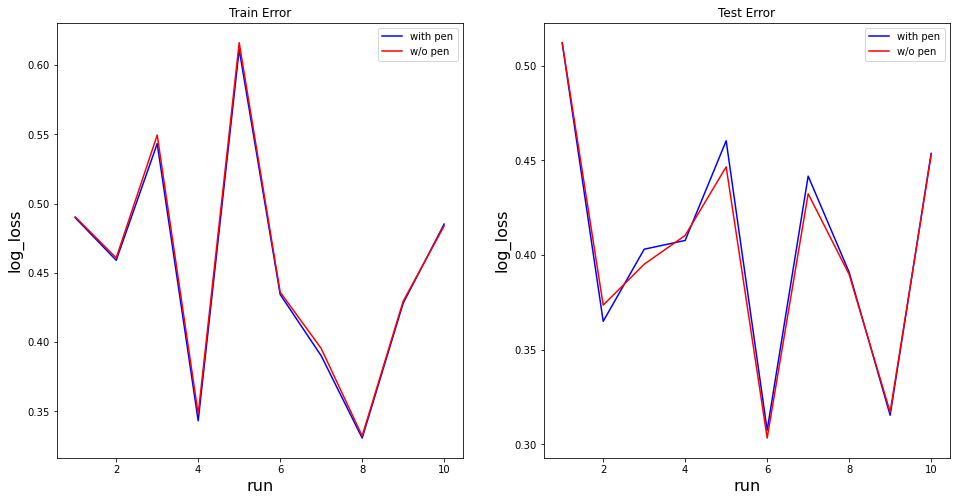

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

r = np.arange(1, 11)
ax[0].plot(r, results_1_pen_df["min_train_err_cv"], color="blue", label="with pen")
ax[0].plot(r, results_2_pen_df["min_train_err_cv"], color="red", label="w/o pen")
ax[0].set_xlabel(r"run", fontsize=16)
ax[0].set_ylabel(r"log_loss", fontsize=16)
ax[0].set_title("Train Error")
ax[0].legend()

ax[1].plot(r, results_1_pen_df["test_err"], color="blue", label="with pen")
ax[1].plot(r, results_2_pen_df["test_err"], color="red", label="w/o pen")
ax[1].set_xlabel(r"run", fontsize=16)
ax[1].set_ylabel(r"log_loss", fontsize=16)
ax[1].set_title("Test Error")
ax[1].legend()

In [ ]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, beta_val_3 = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, np.array([1.0]), l1_vals, np.logspace(0, 3, n_iter), l2_norm=False)

res_6_df = build_table_from_log(gamma, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                        train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

Check the score using the $\beta_{true}$ weights, i.e the log loss from the generative distribution with added noise

In [22]:
perfect_ll_train = np.zeros(100)
perfect_ll_test = np.zeros(100)

for i in range(100):
    X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)

    X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, shuffle=True)

    p_train = sigmoid(X_train_exp @ beta_exp)
    p_test = sigmoid(X_test_exp @ beta_exp)

    perfect_ll_train[i] = log_loss(y_train_exp, p_train)
    perfect_ll_test[i] = log_loss(y_test_exp, p_test)

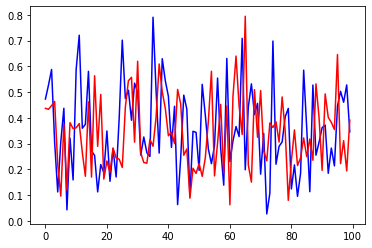

In [23]:
plt.plot(np.arange(0, 100), perfect_ll_train, color="blue")
plt.plot(np.arange(0, 100), perfect_ll_test, color="red")

In [24]:
np.mean(perfect_ll_train)

0.3544627134668399

In [25]:
np.mean(perfect_ll_test)

0.3390154578624262

See the effect of normalizing the Laplacian matrix for a range of $\gamma$ values

In [ ]:
from notebooks.variable_selection.grad_util import *

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_6_lap_norm_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_6_lap_norm_df

In [42]:
from notebooks.variable_selection.grad_util import *
#
# train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
#     train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False, lap_norm=True)
#
# res_6_lap_norm_df = build_table_from_log(gammas, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
#                                 train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_6_lap_norm_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.345598,0.01,0.00001,0.045030,1.177391,0.000000,0.289509,0.050218,1.231253,0.000000
1,0.035938,0.345598,0.01,0.00001,0.045030,1.177391,0.000000,0.289509,0.050218,1.231253,0.000000
2,0.129155,0.352312,0.01,0.00001,0.050226,1.123087,744.073188,0.304028,0.056021,1.190793,890.733503
3,0.464159,0.352727,0.01,0.00001,0.049404,1.134573,752.165920,0.305058,0.055600,1.195059,902.314701
4,1.668101,0.354184,0.01,0.00001,0.050371,1.120249,831.467245,0.305378,0.056213,1.189392,1023.033511
5,5.994843,0.356789,0.01,0.00001,0.050316,1.114110,843.600192,0.314452,0.059028,1.102339,998.874404
6,21.544347,0.353635,0.01,0.00001,0.049881,1.137466,848.529203,0.306339,0.056884,1.179897,1031.554400
7,77.426368,0.352620,0.01,0.00001,0.050529,1.130132,841.852667,0.305188,0.056685,1.181472,1035.737170
8,278.255940,0.354449,0.01,0.00001,0.049978,1.132276,846.508019,0.309357,0.057510,1.150710,1023.775779
9,1000.000000,0.353238,0.01,0.00001,0.050293,1.121135,842.766095,0.310898,0.057961,1.142309,1016.273465


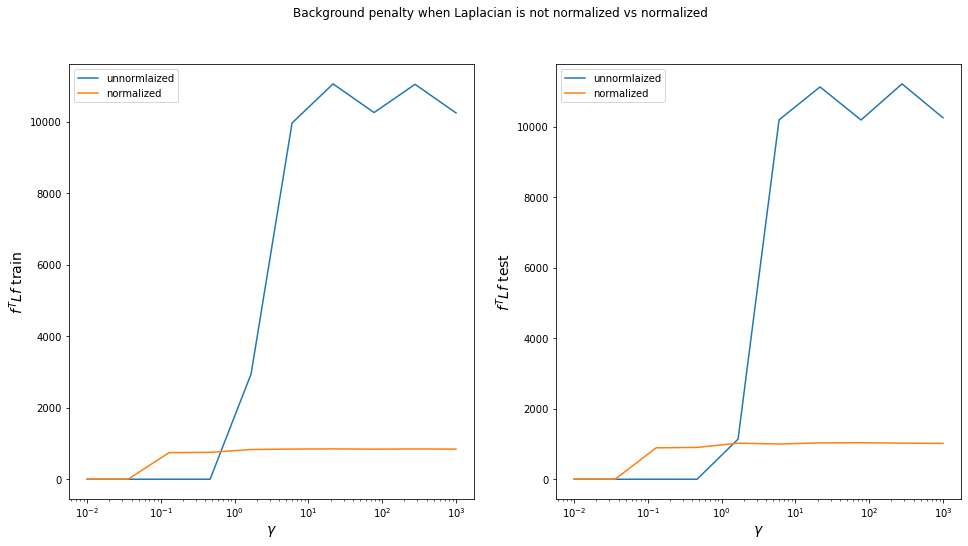

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle("Background penalty when Laplacian is not normalized vs normalized")
ax[0].plot(gammas, res_2_df["l2_pen_train_cv"], label="unnormlaized")
ax[0].plot(gammas, res_6_lap_norm_df["l2_pen_train_cv"], label="normalized")
ax[0].set_xlabel(r"$\gamma$", fontsize=14)
ax[0].set_ylabel(r"$\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ train", fontsize=14)
ax[0].set_xscale("log")
ax[0].legend()

ax[1].plot(gammas, res_2_df["l2_pen_test"], label="unnormlaized")
ax[1].plot(gammas, res_6_lap_norm_df["l2_pen_test"], label="normalized")
ax[1].set_xlabel(r"$\gamma$", fontsize=14)
ax[1].set_ylabel(r"$\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ test", fontsize=14)
ax[1].set_xscale("log")
ax[1].legend()

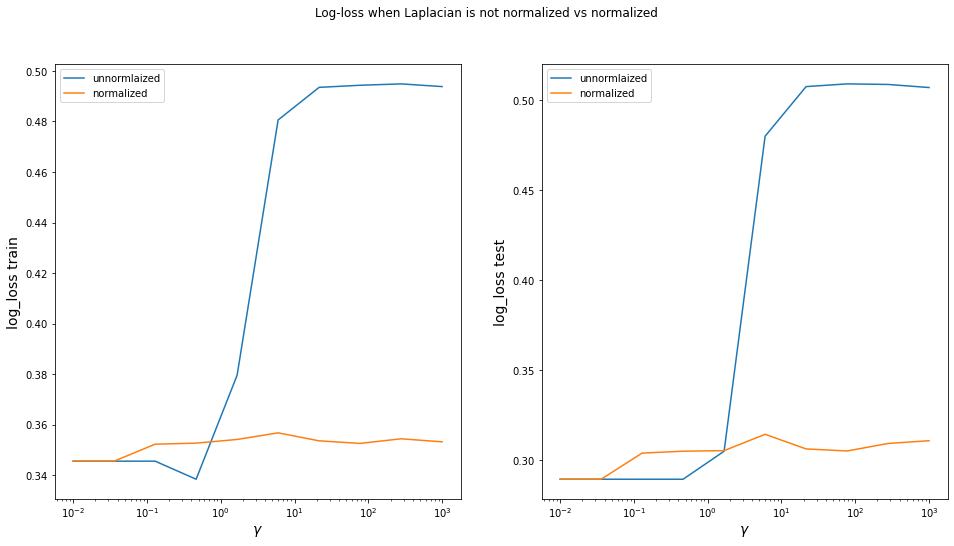

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle("Log-loss when Laplacian is not normalized vs normalized")
ax[0].plot(gammas, res_2_df["min_train_err_cv"], label="unnormlaized")
ax[0].plot(gammas, res_6_lap_norm_df["min_train_err_cv"], label="normalized")
ax[0].set_xlabel(r"$\gamma$", fontsize=14)
ax[0].set_ylabel(r"log_loss train", fontsize=14)
ax[0].set_xscale("log")
ax[0].legend()

ax[1].plot(gammas, res_2_df["test_err"], label="unnormlaized")
ax[1].plot(gammas, res_6_lap_norm_df["test_err"], label="normalized")
ax[1].set_xlabel(r"$\gamma$", fontsize=14)
ax[1].set_ylabel(r"log_loss test", fontsize=14)
ax[1].set_xscale("log")
ax[1].legend()

In [43]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, np.array([1.0]), l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_7_df = build_table_from_log(np.array([1.0]), train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_7_df

[2022-02-16 15:08:42.828786] - gamma - 1.00
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.35400816767595844, Test error: 0.3101700338832327
ll_pen_train: 0.06649448833696657, l1_pen_train: 1.0409118158858814, l2_pen_train: 680.7166201924048


,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.354008,0.013895,0.00001,0.066494,1.040912,680.71662,0.31017,0.078144,1.017199,787.930471


In [44]:
gamma_3 = np.logspace(-1, 0, 5)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gamma_3, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_8_lap_norm_df = build_table_from_log(gamma_3, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gamma_3, l1_vals, l2_vals, l2_norm=False, lap_norm=False)

res_9_lap_unorm_df = build_table_from_log(gamma_3, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

[2022-02-16 15:16:44.813579] - gamma - 0.10
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.35226516439461775, Test error: 0.2895088549744676
ll_pen_train: 0.04878050814394339, l1_pen_train: 1.1432326430925794, l2_pen_train: 759.6167492655778
[2022-02-16 15:22:11.928228] - gamma - 0.18
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.3542490446222216, Test error: 0.30583801087057133
ll_pen_train: 0.06700848051316811, l1_pen_train: 1.0172870188428331, l2_pen_train: 619.7990856781537
[2022-02-16 15:27:41.593143] - gamma - 0.32
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3525791149377608, Test error: 0.31066058324793844
ll_pen_train: 0.049180833707802254, l1_pen_train: 1.1388796711135782, l2_pen_train: 747.0001631796518
[2022-02-16 15:33:03.607494] - gamma - 0.56
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3521524430872638, Test error: 0.31505741599870796
ll_pen_train: 0.0500704251820616, l1_pen_train: 1.1321930802922038, l2_pen_train: 760.4741636099504
[2022-02-16 15:38:15.152588] - gamma - 1

In [45]:
res_8_lap_norm_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.100000,0.352265,0.010000,0.00001,0.048781,1.143233,759.616749,0.289509,0.050218,1.231253,0.000000
1,0.177828,0.354249,0.013895,0.00001,0.067008,1.017287,619.799086,0.305838,0.074885,1.060774,739.350936
2,0.316228,0.352579,0.010000,0.00001,0.049181,1.138880,747.000163,0.310661,0.057365,1.146367,879.137668
3,0.562341,0.352152,0.010000,0.00001,0.050070,1.132193,760.474164,0.315057,0.058717,1.092180,877.141061
4,1.000000,0.354008,0.013895,0.00001,0.066494,1.040912,680.716620,0.310170,0.078144,1.017199,787.930471


In [46]:
res_9_lap_unorm_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.100000,0.345598,0.01,0.000010,0.045030,1.177391,1.399572e-246,0.289509,0.050218,1.231253,0.000000e+00
1,0.177828,0.345598,0.01,0.000010,0.045030,1.177391,1.698936e-78,0.289509,0.050218,1.231253,3.483215e-125
2,0.316228,0.345598,0.01,0.000010,0.045030,1.177391,1.178517e-24,0.289509,0.050218,1.231253,9.511906e-40
3,0.562341,0.340213,0.01,0.000518,0.044667,1.185758,5.687036e-06,0.291545,0.050482,1.215992,3.501490e-11
4,1.000000,0.342357,0.01,0.000027,0.044387,1.206005,3.169218e+01,0.288437,0.049791,1.251608,6.079587e-01


Do multiple runs by sampling from the underlying distribution to see the effect of normalizing the Laplacian. $\gamma$ = 1

In [ ]:
results_3 = []
results_4 = []

n_sim = 10
beta_vals_3 = np.zeros((n_sim, 1, X_train.shape[1]))
beta_vals_4 = np.zeros((n_sim, 1, X_train.shape[1]))

gamma = np.array([1.0])
for i in range(n_sim):
    try:
        #log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_2[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, None, l2_norm=False)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)


        results_3.append(res_pen_df)
        results_4.append(res_no_pen_df)
    except Exception as e:
        #log_msg("Oh, no! An error occurred. Here is the error message")
        print(traceback.format_exc())

[2022-02-16 16:14:29.687632] - gamma - 1.00
Min l1: 0.02682695795279726, Min l2: 1e-05, CV Error: 0.5646922119396192, Test error: 0.3819285572378589
ll_pen_train: 0.14268754727888572, l1_pen_train: 0.75416674576236, l2_pen_train: 344.59279433287196
[2022-02-16 16:19:39.850899] - gamma - 1.00
Min l1: 0.02682695795279726, CV Error: 0.5639621470399833, Test error: 0.38228864676756624
ll_pen_train: 0.1389390131718477, l1_pen_train: 0.7685915046257306
[2022-02-16 16:19:51.801170] - gamma - 1.00
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.4499689018772182, Test error: 0.43462386522252244
ll_pen_train: 0.053359370995659974, l1_pen_train: 1.0366243472331529, l2_pen_train: 771.5605628947425
[2022-02-16 16:25:15.236217] - gamma - 1.00
Min l1: 0.01, CV Error: 0.44476401580515235, Test error: 0.4311238437241859
ll_pen_train: 0.0480142247067416, l1_pen_train: 1.0944390536084898
[2022-02-16 16:25:27.361084] - gamma - 1.00
Min l1: 0.02682695795279726, Min l2: 1e-05, CV Error: 0.4902497968615084, Test er

In [56]:
results_3_pen_df = pd.concat(results_3, axis=0)
results_3_pen_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.564692,0.026827,0.000010,0.142688,0.754167,344.592794,0.381929,0.159219,0.763373,391.332987
0,1.0,0.449969,0.010000,0.000010,0.053359,1.036624,771.560563,0.434624,0.059832,1.095453,902.209210
0,1.0,0.490250,0.026827,0.000010,0.135261,0.708937,359.169453,0.445290,0.148420,0.770289,433.788390
0,1.0,0.336078,0.010000,0.000010,0.049512,1.108907,844.247340,0.392457,0.058251,1.072195,961.083274
0,1.0,0.515824,0.037276,0.000010,0.193492,0.665208,242.287132,0.343459,0.215211,0.710548,288.379253
0,1.0,0.587768,0.010000,0.000193,0.120896,0.766643,343.882099,0.588607,0.136421,0.830160,373.276555
0,1.0,0.369304,0.010000,0.000010,0.054019,1.174434,764.112361,0.395556,0.057121,1.286245,960.760539
0,1.0,0.428083,0.013895,0.000010,0.070067,0.989012,650.544643,0.415746,0.077902,1.053846,774.876425
0,1.0,0.373682,0.010000,0.000010,0.052414,1.144670,801.125885,0.294188,0.056263,1.270760,977.455809
0,1.0,0.366425,0.010000,0.000010,0.052985,1.117746,797.870437,0.377703,0.058834,1.204985,961.378906


In [57]:
results_3_pen_df.mean()

gamma                 1.000000
min_train_err_cv      0.448208
l1_train_cv           0.016482
l2_train_cv           0.000028
ll_pen_train_cv       0.092469
l1_pen_train_cv       0.946635
l2_pen_train_cv     591.939271
test_err              0.406956
ll_pen_test           0.102748
l1_pen_test           1.005785
l2_pen_test         702.454135
dtype: float64

In [58]:
results_4_pen_df = pd.concat(results_4, axis=0)
results_4_pen_df

,gamma,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,1.0,0.563962,0.026827,0.138939,0.768592,0.382289,0.158763,0.752776
0,1.0,0.444764,0.010000,0.048014,1.094439,0.431124,0.053613,1.160938
0,1.0,0.488188,0.019307,0.093472,0.838029,0.446443,0.109565,0.838506
0,1.0,0.328091,0.010000,0.043885,1.187984,0.370335,0.050183,1.207588
0,1.0,0.514735,0.037276,0.192810,0.666681,0.346467,0.218647,0.687193
0,1.0,0.605741,0.026827,0.143803,0.719823,0.551415,0.150993,0.824692
0,1.0,0.360655,0.010000,0.048828,1.230962,0.390392,0.052423,1.307360
0,1.0,0.420670,0.010000,0.046731,1.134831,0.408459,0.052325,1.203791
0,1.0,0.370212,0.010000,0.047406,1.193672,0.279432,0.050808,1.306513
0,1.0,0.362938,0.010000,0.047902,1.158826,0.364168,0.051021,1.298319


In [59]:
results_4_pen_df.mean()

gamma               1.000000
min_train_err_cv    0.445996
l1_train_cv         0.017024
ll_pen_train_cv     0.085179
l1_pen_train_cv     0.999384
test_err            0.397052
ll_pen_test         0.094834
l1_pen_test         1.058768
dtype: float64

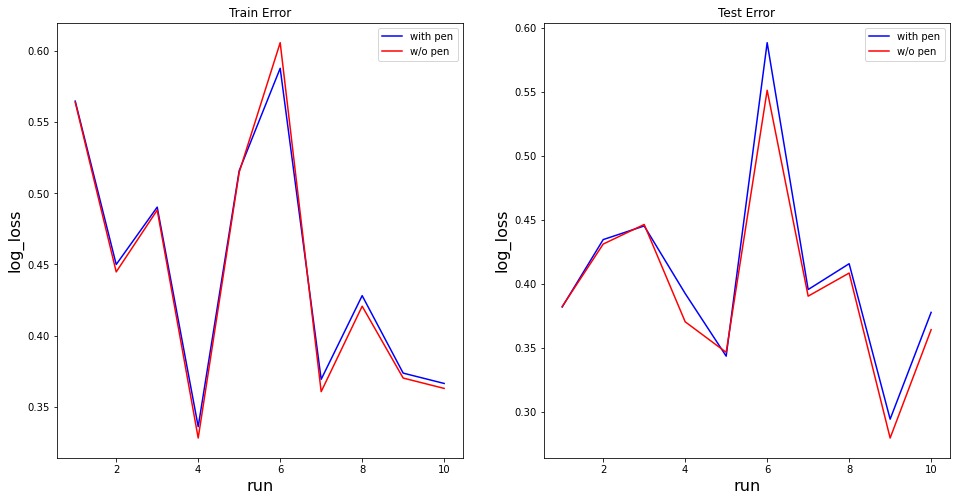

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

r = np.arange(1, 11)
ax[0].plot(r, results_3_pen_df["min_train_err_cv"], color="blue", label="with pen")
ax[0].plot(r, results_4_pen_df["min_train_err_cv"], color="red", label="w/o pen")
ax[0].set_xlabel(r"run", fontsize=16)
ax[0].set_ylabel(r"log_loss", fontsize=16)
ax[0].set_title("Train Error")
ax[0].legend()

ax[1].plot(r, results_3_pen_df["test_err"], color="blue", label="with pen")
ax[1].plot(r, results_4_pen_df["test_err"], color="red", label="w/o pen")
ax[1].set_xlabel(r"run", fontsize=16)
ax[1].set_ylabel(r"log_loss", fontsize=16)
ax[1].set_title("Test Error")
ax[1].legend()

In a run above with the normalized Laplacian, we got the minimum test error with $\gamma$ = 0.01. Let's see if it is isn't due a lucky run

In [62]:
from notebooks.variable_selection.log_util import *
n_sim = 10
beta_vals_5 = np.zeros((n_sim, 1, X_train.shape[1]))

results_5 = []

gamma = np.array([0.01])
for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_5[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)



        results_5.append(res_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

[2022-02-16 19:44:15.056984] - Sim 1...
[2022-02-16 19:44:17.962825] - gamma - 0.01
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.5325596185477147, Test error: 0.4845223434783951
ll_pen_train: 0.06783753781507426, l1_pen_train: 1.0198850722502955, l2_pen_train: 0.0
[2022-02-16 19:49:45.599554] - Sim 2...
[2022-02-16 19:49:45.770598] - gamma - 0.01
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.34869562427341017, Test error: 0.3260898028928606
ll_pen_train: 0.04530393828642966, l1_pen_train: 1.1541924791563243, l2_pen_train: 0.0
[2022-02-16 19:55:16.343255] - Sim 3...
[2022-02-16 19:55:16.504568] - gamma - 0.01
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.35934660407048175, Test error: 0.32850803335397727
ll_pen_train: 0.045159493660242474, l1_pen_train: 1.2395719471412705, l2_pen_train: 0.0
[2022-02-16 20:00:39.083074] - Sim 4...
[2022-02-16 20:00:39.256531] - gamma - 0.01
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3806018081135777, Test error: 0.3857861972595304
ll_pen_train: 0.0456859

In [64]:
results_5_pen_df = pd.concat(results_5, axis=0)
results_5_pen_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.01,0.532560,0.013895,0.00001,0.067838,1.019885,0.0,0.484522,0.077290,1.085086,0.0
0,0.01,0.348696,0.010000,0.00001,0.045304,1.154192,0.0,0.326090,0.050767,1.215236,0.0
0,0.01,0.359347,0.010000,0.00001,0.045159,1.239572,0.0,0.328508,0.050027,1.330391,0.0
0,0.01,0.380602,0.010000,0.00001,0.045686,1.160280,0.0,0.385786,0.050993,1.248219,0.0
0,0.01,0.394985,0.010000,0.00001,0.046728,1.235224,0.0,0.325389,0.051465,1.316701,0.0
0,0.01,0.385577,0.019307,0.00001,0.089824,0.864021,0.0,0.359054,0.100511,0.890405,0.0
0,0.01,0.313609,0.010000,0.00001,0.045001,1.135998,0.0,0.347401,0.048834,1.217244,0.0
0,0.01,0.520105,0.037276,0.00001,0.192470,0.652062,0.0,0.436354,0.220822,0.640404,0.0
0,0.01,0.533852,0.019307,0.00001,0.098696,0.894537,0.0,0.413768,0.108308,0.964739,0.0
0,0.01,0.366705,0.013895,0.00001,0.064791,1.025283,0.0,0.368518,0.071282,1.104441,0.0


In [65]:
results_5_pen_df.mean()

gamma               0.010000
min_train_err_cv    0.413604
l1_train_cv         0.015368
l2_train_cv         0.000010
ll_pen_train_cv     0.074150
l1_pen_train_cv     1.038105
l2_pen_train_cv     0.000000
test_err            0.377539
ll_pen_test         0.083030
l1_pen_test         1.101287
l2_pen_test         0.000000
dtype: float64

Use $\mathbf{}{\beta}^{T}\mathbf{}{L}\mathbf{}{\beta}\mathbf{}$ instead of $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$

In [85]:
warnings.simplefilter('always')
train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_6 = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gamma, np.array([0.01]), l2_vals,
                                                                                                                                           l2_norm=False, lap_norm=True, use_coef=True)

res_pen_coef_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

[2022-02-17 11:23:33.756503] - gamma - 0.01
[2022-02-17 11:23:33.757525] - fold - 1
[2022-02-17 11:23:33.780241] - Using l1 - 0.01, l2 - 1e-05
[2022-02-17 11:23:47.933081] - Using l1 - 0.01, l2 - 2.6826957952797274e-05
[2022-02-17 11:24:02.180342] - Using l1 - 0.01, l2 - 7.196856730011514e-05
[2022-02-17 11:24:16.503714] - Using l1 - 0.01, l2 - 0.00019306977288832496
[2022-02-17 11:24:30.617260] - Using l1 - 0.01, l2 - 0.0005179474679231213
[2022-02-17 11:24:44.781411] - Using l1 - 0.01, l2 - 0.0013894954943731374
[2022-02-17 11:24:58.928194] - Using l1 - 0.01, l2 - 0.003727593720314938
[2022-02-17 11:25:12.858615] - Using l1 - 0.01, l2 - 0.01
[2022-02-17 11:25:26.559740] - Using l1 - 0.01, l2 - 0.026826957952797246
[2022-02-17 11:25:40.699547] - Using l1 - 0.01, l2 - 0.07196856730011514
[2022-02-17 11:25:54.757974] - Using l1 - 0.01, l2 - 0.19306977288832497
[2022-02-17 11:26:08.907418] - Using l1 - 0.01, l2 - 0.5179474679231213
[2022-02-17 11:26:23.044310] - Using l1 - 0.01, l2 - 1.3

In [86]:
res_pen_coef_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.01,0.316174,0.01,0.19307,0.061541,1.104913,0.03329,0.248868,0.068675,1.179188,0.034986


In [90]:
from notebooks.variable_selection.log_util import *
n_sim = 10
# beta_vals_6 = np.zeros((n_sim, 1, X_train.shape[1]))

results_6 = []
results_7 = []

l1_val = np.array([0.01])
gamma = np.array([0.01])
for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, _ = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_val, l2_vals,
                                                                                                                                           l2_norm=False, lap_norm=True, use_coef=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        results_6.append(res_pen_df)

    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

log_msg("Done")

[2022-02-17 16:57:18.529808] - Sim 1...
[2022-02-17 16:57:18.781181] - gamma - 0.01
Min l1: 0.01, Min l2: 0.19306977288832497, CV Error: 0.5076914773083699, Test error: 0.35802258310638846
ll_pen_train: 0.0657134056641668, l1_pen_train: 1.1023289850857778, l2_pen_train: 0.03839113908736808
[2022-02-17 17:15:59.276132] - Sim 2...
[2022-02-17 17:15:59.461678] - gamma - 0.01
Min l1: 0.01, Min l2: 0.5179474679231213, CV Error: 0.3117331599436471, Test error: 0.2815223422236658
ll_pen_train: 0.06147062430988677, l1_pen_train: 1.266429758627134, l2_pen_train: 0.005808658128271331
[2022-02-17 17:34:41.881600] - Sim 3...
[2022-02-17 17:34:42.053085] - gamma - 0.01
Min l1: 0.01, Min l2: 0.19306977288832497, CV Error: 0.3254104894548421, Test error: 0.3759382466957665
ll_pen_train: 0.06082582973039931, l1_pen_train: 1.1336585154028203, l2_pen_train: 0.031632800064159146
[2022-02-17 17:52:31.274427] - Sim 4...
[2022-02-17 17:52:31.462163] - gamma - 0.01
Min l1: 0.01, Min l2: 0.5179474679231213, C

In [91]:
results_6_pen_coef_df = pd.concat(results_6, axis=0)
results_6_pen_coef_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.01,0.507691,0.01,0.193070,0.065713,1.102329,0.038391,0.358023,0.075115,1.230602,0.039852
0,0.01,0.311733,0.01,0.517947,0.061471,1.266430,0.005809,0.281522,0.069571,1.382505,0.006349
0,0.01,0.325410,0.01,0.193070,0.060826,1.133659,0.031633,0.375938,0.068214,1.196657,0.030588
0,0.01,0.388662,0.01,0.517947,0.066469,1.176475,0.007909,0.281154,0.076946,1.224667,0.009290
0,0.01,0.382133,0.01,0.071969,0.060366,1.078388,0.143294,0.341712,0.067263,1.180522,0.140684
0,0.01,0.204351,0.01,1.389495,0.055307,1.308020,0.000804,0.271614,0.060646,1.390061,0.000887
0,0.01,0.650125,0.01,0.193070,0.073250,1.067065,0.049411,0.364477,0.086641,1.105556,0.051050
0,0.01,0.399523,0.01,0.193070,0.062655,1.095187,0.032504,0.521117,0.069140,1.156404,0.032467
0,0.01,0.441462,0.01,0.193070,0.065684,1.115286,0.040250,0.391881,0.074718,1.210627,0.044595
0,0.01,0.456680,0.01,0.071969,0.062822,1.058466,0.158044,0.247116,0.068768,1.200749,0.157571


In [92]:
results_6_pen_coef_df.mean(axis=0)

gamma               0.010000
min_train_err_cv    0.406777
l1_train_cv         0.010000
l2_train_cv         0.353468
ll_pen_train_cv     0.063456
l1_pen_train_cv     1.140130
l2_pen_train_cv     0.050805
test_err            0.343455
ll_pen_test         0.071702
l1_pen_test         1.227835
l2_pen_test         0.051333
dtype: float64